In [1]:
import pandas as pd
import numpy as np

In [2]:
'''
the observation data is the date of the target date of the observation, the columns is the economist who made the forecasts, the "As of" column on the left of each economist is the corresponding date such economist made the forecast.
'''

#GDP is the GDP CQOQ from bloomberg terminal, Gross Domesitc Product, Constant Quarter-On-Quarter
GDP_CQOQ = pd.read_excel("GDP CQOQ.xlsx")
GDP_CQOQ['Observation Date'] = pd.to_datetime(GDP_CQOQ['Observation Date'], format='%m/%d/%Y')
GDP_CQOQ = GDP_CQOQ.set_index('Observation Date')
GDP_CQOQ = GDP_CQOQ.replace('--', np.nan)



In [3]:
GDP_actual = pd.read_excel('FRED_actual.xls')


#GDP_actual = GDP_actual.drop(['observation_date'], axis= 1)
#GDP_CQOQ['Observation Date'] = pd.to_datetime(GDP_CQOQ['Observation Date'], format='%m/%d/%Y')
GDP_actual = GDP_actual.set_index('observation_date')

GDP_actual

,GDP
observation_date,
2000-04-01,1.5
2000-07-01,7.5
2000-10-01,0.4
2001-01-01,2.4
2001-04-01,-1.3
...,...
2022-04-01,-1.6
2022-07-01,-0.6
2022-10-01,3.2


In [4]:
print(GDP_CQOQ.columns)

Index(['Release Date', 'Actual', 'Firm', 'As of',
       '3d Currency Management Limited', 'As of.1',
       '4CAST/Continuum Economics', 'As of.2', 'ABN Amro Bank N.V.', 'As of.3',
       ...
       'As of.310', 'Wealthify Limited', 'As of.311', 'Wells Fargo Bank NA',
       'As of.312', 'Westpac Banking Corp', 'As of.313',
       'Westpac Banking Corp.1', 'As of.314', 'Wrightson ICAP LLC'],
      dtype='object', length=633)


In [5]:
#Release date row is not removed for validating the spliting result from the next cell
GDP = GDP_CQOQ.copy()
GDP_to_drop = GDP.columns[GDP.columns.str.contains('As of')]
GDP = GDP.drop(GDP_to_drop, axis=1)
GDP = GDP.drop('Firm', axis= 1)

In [6]:
#GDP data treatment, GDP CQOQ has three release, the first release is a month after the target observation date, second and final release each are a two month and three month after. We will be spliting the GDP data into three dataset which includes the first, second, and final release of GDP data and corresponding forecast.

GDP1 = GDP.iloc[::3]  # Every 3rd row starting from 0
GDP2 = GDP.iloc[1::3]  # Every 3rd row starting from 1
GDP3 = GDP.iloc[2::3]  # Every 3rd row starting from 2

In [7]:
GDP1

,Release Date,Actual,3d Currency Management Limited,4CAST/Continuum Economics,ABN Amro Bank N.V.,ABN Amro Bank NV,AIB Capital Markets PLC,Acciones y Valores SA/Colombia,Action Economics LLC,Aletti Gestielle Sgr Spa,...,Union Investment Privatfonds GmbH.1,United Nations Development Programme,University of Maryland,University of North Carolina,Visa USA Inc,Wealthify Limited,Wells Fargo Bank NA,Westpac Banking Corp,Westpac Banking Corp.1,Wrightson ICAP LLC
Observation Date,,,,,,,,,,,,,,,,,,,,,
2000-03-31,2000-04-27,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2
2000-06-30,2000-07-28,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2000-09-30,2000-10-27,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,2001-01-31,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3
2001-03-31,2001-04-27,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,2022-04-28,-1.4,NaN,1.1,1.4,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,1.0,NaN,-1.0,NaN,0.6,1.5,NaN,1.0
2022-06-30,2022-07-28,-0.9,NaN,0.7,1.0,NaN,NaN,NaN,1.2,NaN,...,NaN,NaN,0.3,NaN,-2.1,NaN,0.2,-0.5,NaN,1.1
2022-09-30,2022-10-27,2.6,NaN,3.0,1.8,NaN,NaN,2.5,1.4,NaN,...,NaN,NaN,2.2,NaN,2.5,NaN,2.8,2.1,NaN,1.9


In [8]:
GDP2

,Release Date,Actual,3d Currency Management Limited,4CAST/Continuum Economics,ABN Amro Bank N.V.,ABN Amro Bank NV,AIB Capital Markets PLC,Acciones y Valores SA/Colombia,Action Economics LLC,Aletti Gestielle Sgr Spa,...,Union Investment Privatfonds GmbH.1,United Nations Development Programme,University of Maryland,University of North Carolina,Visa USA Inc,Wealthify Limited,Wells Fargo Bank NA,Westpac Banking Corp,Westpac Banking Corp.1,Wrightson ICAP LLC
Observation Date,,,,,,,,,,,,,,,,,,,,,
2000-03-31,2000-05-25,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2000-06-30,2000-08-25,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2000-09-30,2000-11-29,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.8
2000-12-31,2001-02-28,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9
2001-03-31,2001-05-25,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,2022-05-26,-1.5,NaN,-1.4,-1.4,NaN,NaN,NaN,-1.3,NaN,...,NaN,NaN,-1.4,NaN,-1.4,NaN,-1.4,NaN,NaN,-1.2
2022-06-30,2022-08-25,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,NaN,...,NaN,NaN,-0.9,NaN,-0.4,NaN,-0.5,NaN,NaN,-0.2
2022-09-30,2022-11-30,2.9,NaN,3.0,2.6,NaN,NaN,NaN,3.2,NaN,...,NaN,NaN,2.6,NaN,3.2,NaN,2.6,NaN,NaN,3.0


In [69]:
import pandas as pd
import matplotlib.pyplot as plt

def create_forecast_plot(df: pd.DataFrame, year: int, name: str):
    """
    Function to create a forecast plot for a given DataFrame, year and title.

    Parameters:
    df (pd.DataFrame): The DataFrame with the data to plot. It should have a DateTime index and a column named 'Actual'.
    year (int): The year for which to create the plot.
    name (str): The name to put in the plot's title.

    """

    # Filter DataFrame to only include rows for the specified year
    df_year = df[df.index.year == year]

    # Print shape of DataFrame for debugging purposes
    print(df_year.shape)

    # Get forecast columns (all columns except 'Actual')
    forecast_cols = df_year.columns[1:]

    # Create a figure and axis with a specific size
    fig, ax = plt.subplots(figsize=(16, 12))

    # Increase the space between the plot and the title
    plt.subplots_adjust(top=0.85)

    # Create boxplot of forecast columns
    # The 'whis' parameter specifies that the whiskers should go from the minimum to the maximum of the data
    # The properties parameters (capprops, boxprops, medianprops, whiskerprops) specify the color and line width of different elements of the boxplot
    bp = df_year[forecast_cols].T.boxplot(ax=ax, positions=range(len(df_year.index)),
                                           whis=[0, 100],
                                           capprops = {'color': '#496C88', 'linewidth': 2},
                                           boxprops = {'color': '#496C88', 'linewidth': 2},
                                           medianprops = {'color': '#E88482', 'linewidth': 2},
                                           whiskerprops = {'color': '#A5B6C5', 'linewidth': 2})

    # Add text to the plot indicating the number of observations for each date
    for i, date in enumerate(df_year.index):
        num_observations = df_year.loc[date, forecast_cols].count()
        ax.text(i, ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.01,
                str(num_observations), ha='center', color='#496C88', fontsize = 'large',
                fontweight = 'bold')

    # Increase line width of the boxes in the boxplot
    for box in bp.artists:
        box.set_linewidth(2.5)

    # Plot actual values as red dots
    ax.scatter(x=range(len(df_year.index)), y=df_year['Actual'], color='#FEB2B4', s=200)

    # Find the months where the actual value was outside the range of predictions
    outside_range = (df_year['Actual'] < df_year[forecast_cols].min(axis=1)) | (df_year['Actual'] > df_year[forecast_cols].max(axis=1))

    # Plot these months with a different marker
    ax.scatter(x=np.where(outside_range)[0], y=df_year['Actual'][outside_range], color='BLUE',
               marker='x', linewidths=2.5, s= 50)

    # Set the labels and title of the plot
    ax.set_xlabel('Date',fontsize = 'xx-large')
    ax.set_ylabel('Forecast',fontsize = 'xx-large')
    ax.set_title(f'Boxplot for {name} Forecasting - {year}',fontsize = 'xx-large')

    # Set x-tick labels to be dates, formatted as 'YYYY-MM-DD'
    ax.set_xticklabels(df_year.index.strftime('%Y-%m-%d'), fontsize = 'large')

    # Set the line width of the plot's spines
    for spine in ax.spines.values():
        spine.set_linewidth(1)

    # Rotate x-tick labels 45 degrees for better visualization
    plt.xticks(rotation=45)

    # Remove grid from plot
    plt.grid(False)

    # Show the plot
    plt.show()

(4, 317)


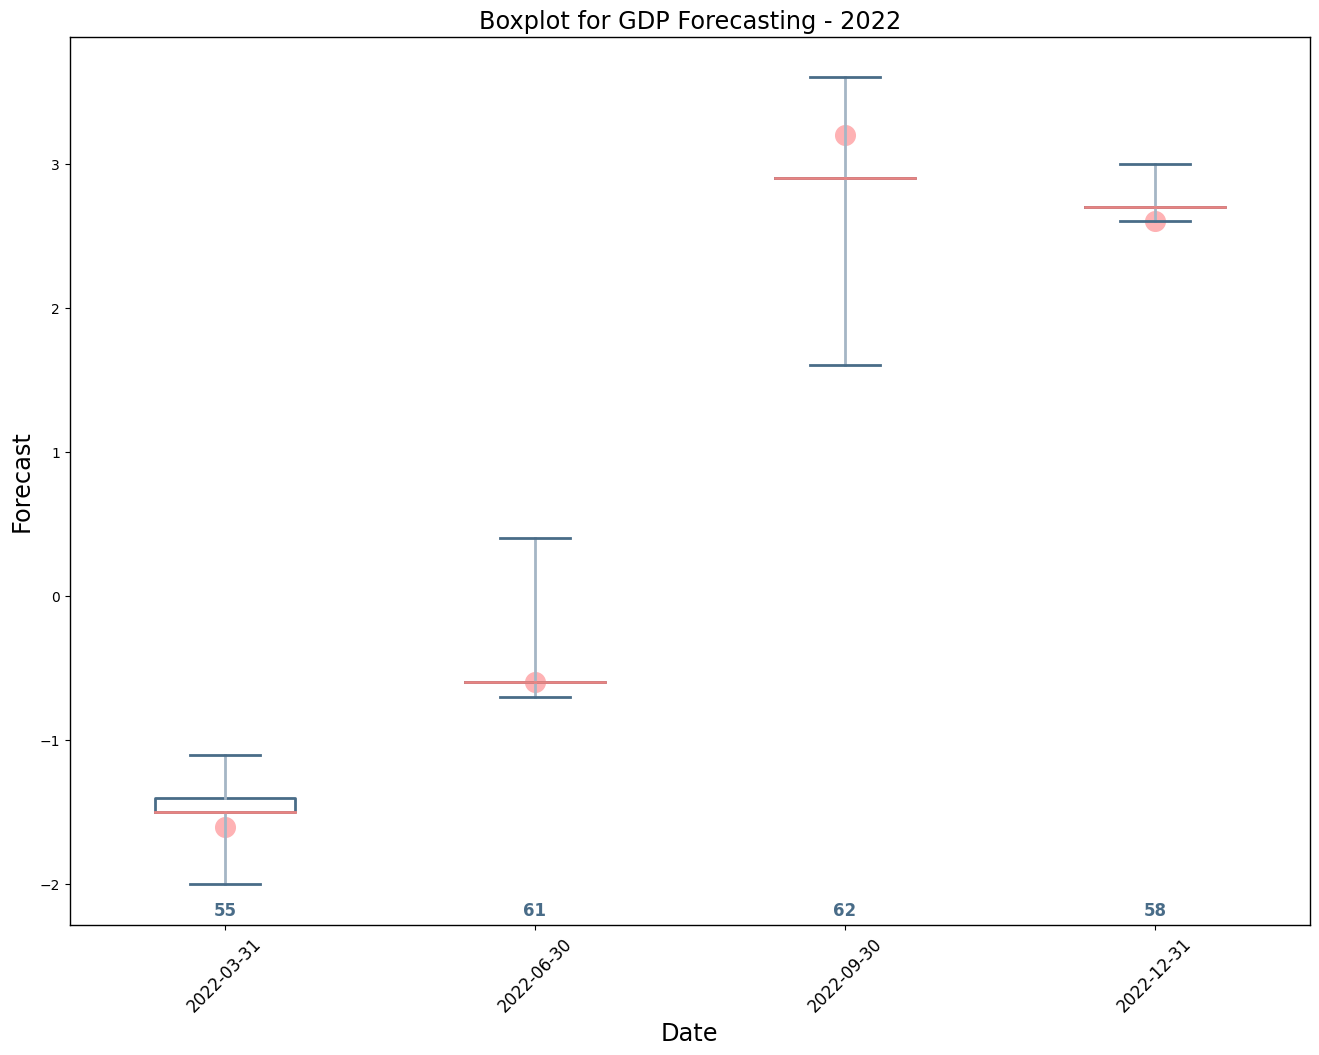

In [70]:
create_forecast_plot(GDP3, 2022, 'GDP')

In [11]:
#There are three releases for each of the quarter, however, 12/31/2018 misses the first release that were scheduled on Jan, 2019.
#For the ease of manipulating the data, I manually replicates another row of 3/28/2019 release on the Obsersation date of 12/31/2018
GDP_1 = GDP1.copy()
GDP_2 = GDP2.copy()
GDP_3 = GDP3.copy()

#We will first set all actual value as the final realease
GDP_label = GDP_3['Actual']
GDP_1 = GDP_1.drop(['Release Date'], axis= 1)
GDP_2 = GDP_2.drop(['Release Date'], axis= 1)
GDP_3 = GDP_3.drop(['Release Date'], axis= 1)



In [12]:
GDP_1.set_index(GDP_actual.index, inplace=True)
GDP_2.set_index(GDP_actual.index, inplace=True)
GDP_3.set_index(GDP_actual.index, inplace=True)

In [13]:
GDP_1

,Actual,3d Currency Management Limited,4CAST/Continuum Economics,ABN Amro Bank N.V.,ABN Amro Bank NV,AIB Capital Markets PLC,Acciones y Valores SA/Colombia,Action Economics LLC,Aletti Gestielle Sgr Spa,AllianceBernstein L.P.,...,Union Investment Privatfonds GmbH.1,United Nations Development Programme,University of Maryland,University of North Carolina,Visa USA Inc,Wealthify Limited,Wells Fargo Bank NA,Westpac Banking Corp,Westpac Banking Corp.1,Wrightson ICAP LLC
observation_date,,,,,,,,,,,,,,,,,,,,,
2000-04-01,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2
2000-07-01,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2000-10-01,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3
2001-04-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,-1.4,NaN,1.1,1.4,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,1.0,NaN,-1.0,NaN,0.6,1.5,NaN,1.0
2022-07-01,-0.9,NaN,0.7,1.0,NaN,NaN,NaN,1.2,NaN,NaN,...,NaN,NaN,0.3,NaN,-2.1,NaN,0.2,-0.5,NaN,1.1
2022-10-01,2.6,NaN,3.0,1.8,NaN,NaN,2.5,1.4,NaN,NaN,...,NaN,NaN,2.2,NaN,2.5,NaN,2.8,2.1,NaN,1.9


In [15]:
GDP_1

,Actual,3d Currency Management Limited,4CAST/Continuum Economics,ABN Amro Bank N.V.,ABN Amro Bank NV,AIB Capital Markets PLC,Acciones y Valores SA/Colombia,Action Economics LLC,Aletti Gestielle Sgr Spa,AllianceBernstein L.P.,...,Union Investment Privatfonds GmbH.1,United Nations Development Programme,University of Maryland,University of North Carolina,Visa USA Inc,Wealthify Limited,Wells Fargo Bank NA,Westpac Banking Corp,Westpac Banking Corp.1,Wrightson ICAP LLC
observation_date,,,,,,,,,,,,,,,,,,,,,
2000-04-01,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2
2000-07-01,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2000-10-01,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3
2001-04-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,-1.4,NaN,1.1,1.4,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,1.0,NaN,-1.0,NaN,0.6,1.5,NaN,1.0
2022-07-01,-0.9,NaN,0.7,1.0,NaN,NaN,NaN,1.2,NaN,NaN,...,NaN,NaN,0.3,NaN,-2.1,NaN,0.2,-0.5,NaN,1.1
2022-10-01,2.6,NaN,3.0,1.8,NaN,NaN,2.5,1.4,NaN,NaN,...,NaN,NaN,2.2,NaN,2.5,NaN,2.8,2.1,NaN,1.9


In [17]:
GDP_1

,Actual,3d Currency Management Limited,4CAST/Continuum Economics,ABN Amro Bank N.V.,ABN Amro Bank NV,AIB Capital Markets PLC,Acciones y Valores SA/Colombia,Action Economics LLC,Aletti Gestielle Sgr Spa,AllianceBernstein L.P.,...,Union Investment Privatfonds GmbH.1,United Nations Development Programme,University of Maryland,University of North Carolina,Visa USA Inc,Wealthify Limited,Wells Fargo Bank NA,Westpac Banking Corp,Westpac Banking Corp.1,Wrightson ICAP LLC
observation_date,,,,,,,,,,,,,,,,,,,,,
2000-04-01,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2
2000-07-01,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2000-10-01,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3
2001-04-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,-1.4,NaN,1.1,1.4,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,1.0,NaN,-1.0,NaN,0.6,1.5,NaN,1.0
2022-07-01,-0.9,NaN,0.7,1.0,NaN,NaN,NaN,1.2,NaN,NaN,...,NaN,NaN,0.3,NaN,-2.1,NaN,0.2,-0.5,NaN,1.1
2022-10-01,2.6,NaN,3.0,1.8,NaN,NaN,2.5,1.4,NaN,NaN,...,NaN,NaN,2.2,NaN,2.5,NaN,2.8,2.1,NaN,1.9


In [18]:
GDP_1['Actual'] = GDP_actual['GDP']
GDP_2['Actual'] = GDP_actual['GDP']
GDP_3['Actual'] = GDP_actual['GDP']
#GDP_actual = GDP_actual.drop(['observation_date'], axis= 1)
#GDP_CQOQ['Observation Date'] = pd.to_datetime(GDP_CQOQ['Observation Date'], format='%m/%d/%Y')
#GDP_actual = GDP_CQOQ.set_index('Observation Date')

In [19]:
#merged_df = pd.concat([GDP_actual, GDP_1], ignore_index=True)

In [20]:
GDP_1

,Actual,3d Currency Management Limited,4CAST/Continuum Economics,ABN Amro Bank N.V.,ABN Amro Bank NV,AIB Capital Markets PLC,Acciones y Valores SA/Colombia,Action Economics LLC,Aletti Gestielle Sgr Spa,AllianceBernstein L.P.,...,Union Investment Privatfonds GmbH.1,United Nations Development Programme,University of Maryland,University of North Carolina,Visa USA Inc,Wealthify Limited,Wells Fargo Bank NA,Westpac Banking Corp,Westpac Banking Corp.1,Wrightson ICAP LLC
observation_date,,,,,,,,,,,,,,,,,,,,,
2000-04-01,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2
2000-07-01,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2000-10-01,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3
2001-04-01,-1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,-1.6,NaN,1.1,1.4,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,1.0,NaN,-1.0,NaN,0.6,1.5,NaN,1.0
2022-07-01,-0.6,NaN,0.7,1.0,NaN,NaN,NaN,1.2,NaN,NaN,...,NaN,NaN,0.3,NaN,-2.1,NaN,0.2,-0.5,NaN,1.1
2022-10-01,3.2,NaN,3.0,1.8,NaN,NaN,2.5,1.4,NaN,NaN,...,NaN,NaN,2.2,NaN,2.5,NaN,2.8,2.1,NaN,1.9


In [21]:
#result = GDP_1 - GDP_actual
#result.head(35)

In [22]:
GDP_1

,Actual,3d Currency Management Limited,4CAST/Continuum Economics,ABN Amro Bank N.V.,ABN Amro Bank NV,AIB Capital Markets PLC,Acciones y Valores SA/Colombia,Action Economics LLC,Aletti Gestielle Sgr Spa,AllianceBernstein L.P.,...,Union Investment Privatfonds GmbH.1,United Nations Development Programme,University of Maryland,University of North Carolina,Visa USA Inc,Wealthify Limited,Wells Fargo Bank NA,Westpac Banking Corp,Westpac Banking Corp.1,Wrightson ICAP LLC
observation_date,,,,,,,,,,,,,,,,,,,,,
2000-04-01,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2
2000-07-01,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2000-10-01,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3
2001-04-01,-1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,-1.6,NaN,1.1,1.4,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,1.0,NaN,-1.0,NaN,0.6,1.5,NaN,1.0
2022-07-01,-0.6,NaN,0.7,1.0,NaN,NaN,NaN,1.2,NaN,NaN,...,NaN,NaN,0.3,NaN,-2.1,NaN,0.2,-0.5,NaN,1.1
2022-10-01,3.2,NaN,3.0,1.8,NaN,NaN,2.5,1.4,NaN,NaN,...,NaN,NaN,2.2,NaN,2.5,NaN,2.8,2.1,NaN,1.9


In [23]:
def subtract_column(df, column_to_subtract):
    # Iterate over each column (except the column to subtract)
    for column in df.columns:
        if column != column_to_subtract:
            # Subtract the specified column from the current column
            df[column] = df[column] - df[column_to_subtract]

    return df

In [24]:
df = GDP_1

# Specify the column to subtract
column_to_subtract = 'Actual'

# Call the subtract_column function
result_df = subtract_column(df, column_to_subtract)

# Print the modified DataFrame
result_df

,Actual,3d Currency Management Limited,4CAST/Continuum Economics,ABN Amro Bank N.V.,ABN Amro Bank NV,AIB Capital Markets PLC,Acciones y Valores SA/Colombia,Action Economics LLC,Aletti Gestielle Sgr Spa,AllianceBernstein L.P.,...,Union Investment Privatfonds GmbH.1,United Nations Development Programme,University of Maryland,University of North Carolina,Visa USA Inc,Wealthify Limited,Wells Fargo Bank NA,Westpac Banking Corp,Westpac Banking Corp.1,Wrightson ICAP LLC
observation_date,,,,,,,,,,,,,,,,,,,,,
2000-04-01,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.7
2000-07-01,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.5
2000-10-01,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1
2001-04-01,-1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,-1.6,NaN,2.7,3.0,NaN,NaN,NaN,1.6,NaN,NaN,...,NaN,NaN,2.6,NaN,0.6,NaN,2.2,3.1,NaN,2.6
2022-07-01,-0.6,NaN,1.3,1.6,NaN,NaN,NaN,1.8,NaN,NaN,...,NaN,NaN,0.9,NaN,-1.5,NaN,0.8,0.1,NaN,1.7
2022-10-01,3.2,NaN,-0.2,-1.4,NaN,NaN,-0.7,-1.8,NaN,NaN,...,NaN,NaN,-1.0,NaN,-0.7,NaN,-0.4,-1.1,NaN,-1.3


In [25]:
df = GDP_2

# Specify the column to subtract
column_to_subtract = 'Actual'

# Call the subtract_column function
result_df1 = subtract_column(df, column_to_subtract)

# Print the modified DataFrame
result_df1

,Actual,3d Currency Management Limited,4CAST/Continuum Economics,ABN Amro Bank N.V.,ABN Amro Bank NV,AIB Capital Markets PLC,Acciones y Valores SA/Colombia,Action Economics LLC,Aletti Gestielle Sgr Spa,AllianceBernstein L.P.,...,Union Investment Privatfonds GmbH.1,United Nations Development Programme,University of Maryland,University of North Carolina,Visa USA Inc,Wealthify Limited,Wells Fargo Bank NA,Westpac Banking Corp,Westpac Banking Corp.1,Wrightson ICAP LLC
observation_date,,,,,,,,,,,,,,,,,,,,,
2000-04-01,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
2000-07-01,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.5
2000-10-01,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4
2001-01-01,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.5
2001-04-01,-1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,-1.6,NaN,0.2,0.2,NaN,NaN,NaN,0.3,NaN,NaN,...,NaN,NaN,0.2,NaN,0.2,NaN,0.2,NaN,NaN,0.4
2022-07-01,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,...,NaN,NaN,-0.3,NaN,0.2,NaN,0.1,NaN,NaN,0.4
2022-10-01,3.2,NaN,-0.2,-0.6,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,-0.6,NaN,0.0,NaN,-0.6,NaN,NaN,-0.2


In [26]:
df = GDP_3

# Specify the column to subtract
column_to_subtract = 'Actual'

# Call the subtract_column function
result_df2 = subtract_column(df, column_to_subtract)

# Print the modified DataFrame
result_df2

,Actual,3d Currency Management Limited,4CAST/Continuum Economics,ABN Amro Bank N.V.,ABN Amro Bank NV,AIB Capital Markets PLC,Acciones y Valores SA/Colombia,Action Economics LLC,Aletti Gestielle Sgr Spa,AllianceBernstein L.P.,...,Union Investment Privatfonds GmbH.1,United Nations Development Programme,University of Maryland,University of North Carolina,Visa USA Inc,Wealthify Limited,Wells Fargo Bank NA,Westpac Banking Corp,Westpac Banking Corp.1,Wrightson ICAP LLC
observation_date,,,,,,,,,,,,,,,,,,,,,
2000-04-01,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8
2000-07-01,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0
2000-10-01,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2001-01-01,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.3
2001-04-01,-1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,-1.6,NaN,0.2,NaN,NaN,NaN,NaN,0.5,NaN,NaN,...,NaN,NaN,0.3,NaN,0.1,NaN,0.1,NaN,NaN,0.1
2022-07-01,-0.6,NaN,0.0,NaN,NaN,NaN,NaN,0.1,NaN,NaN,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,-0.1
2022-10-01,3.2,NaN,-0.2,-0.3,NaN,NaN,NaN,-0.2,NaN,NaN,...,NaN,NaN,-0.3,NaN,-0.3,NaN,-0.3,NaN,NaN,-0.2


In [27]:
#create_forecast_plot(GDP_3, 2022, 'GDP')

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Create three sample DataFrames
df1 = result_df
df2 = result_df1
df3 = result_df2

# Combine the three DataFrames into a single DataFrame
combined_df = pd.concat([df1, df2, df3], axis=1)



(4, 948)


ValueError: ignored

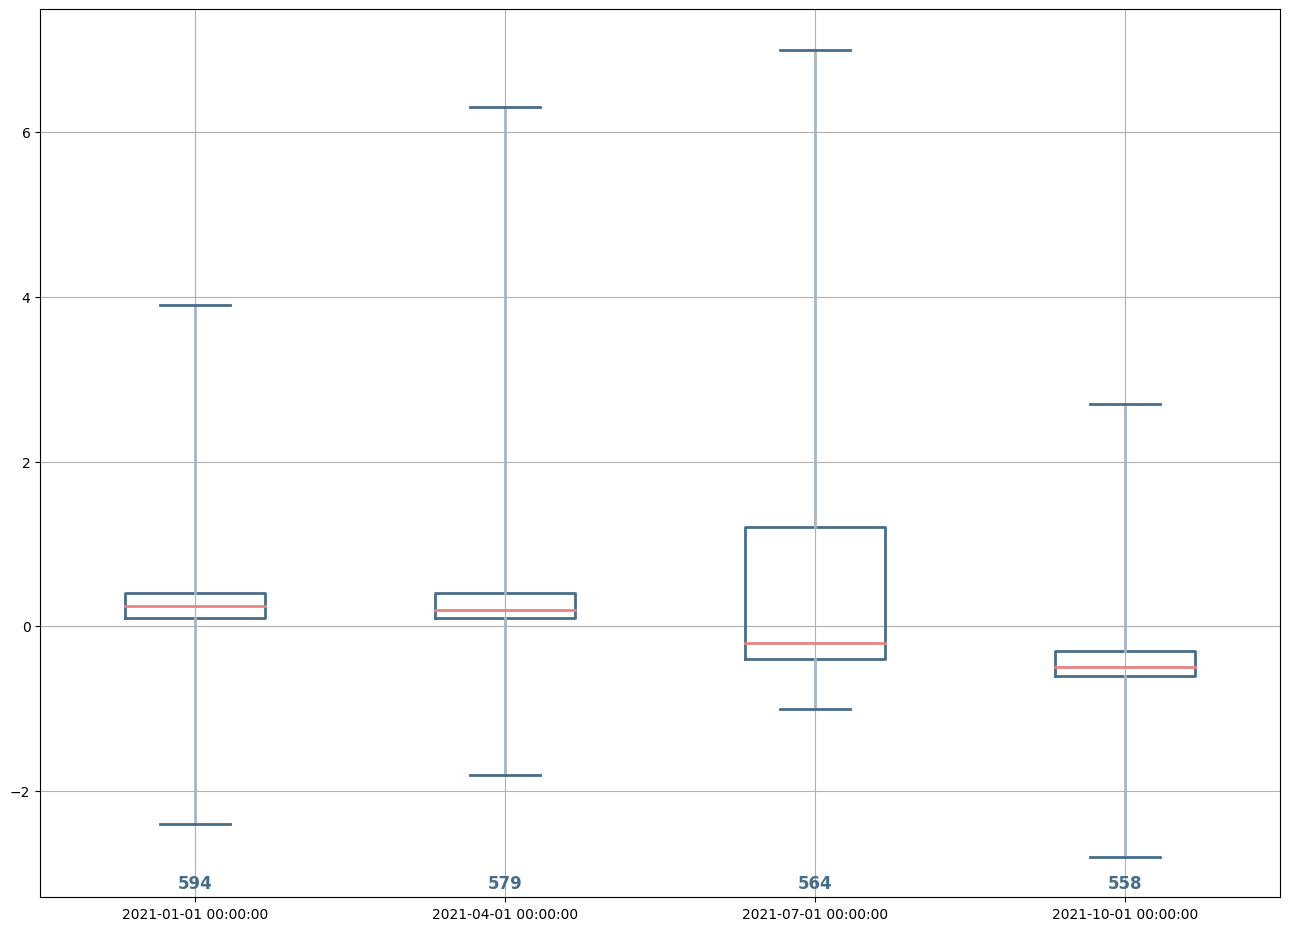

In [71]:
create_forecast_plot(combined_df, 2021, 'GDP')

In [59]:
# Export DataFrame to an Excel file
result_df.to_excel('result_df.xlsx')
result_df1.to_excel('result_df1.xlsx')
result_df2.to_excel('result_df2.xlsx')